In [1]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
#import geopandas as gpd
import geopy as gp
from geopy.geocoders import GoogleV3

In [2]:
df = pd.read_csv('all_countries_data.csv')

In [3]:
df = df.set_index("Unnamed: 0")
df.index.name = None

In [4]:
df.dtypes

Captured Time     object
Latitude         float64
Longitude        float64
Value            float64
Height           float64
Country           object
dtype: object

In [5]:
df['Captured Time'] = pd.to_datetime(df['Captured Time'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df = df.sort_values('Captured Time')

In [7]:
df = df[df['Captured Time'].notnull()]

In [8]:
df.describe()

,Latitude,Longitude,Value,Height
count,3.580242e+07,3.580242e+07,3.580242e+07,3.580242e+07
mean,3.768079e+01,5.639612e+01,4.264755e+01,1.263665e+02
std,4.640615e+00,1.131480e+02,1.065051e+03,2.462002e+02
min,-9.000000e+01,-1.228515e+02,1.000000e+00,-1.809000e+03
25%,3.566170e+01,-7.171281e+01,1.500000e+01,1.100000e+01
50%,3.749614e+01,1.397053e+02,2.800000e+01,6.000000e+01
75%,3.803496e+01,1.405310e+02,4.200000e+01,1.280000e+02
max,9.000000e+01,1.747656e+02,1.136914e+06,6.228000e+03


In [9]:
df = df.groupby(['Captured Time','Country']).mean()
df = df.reset_index()
df

,Captured Time,Country,Latitude,Longitude,Value,Height
0,2000-04-01 09:28:18.000,United States,42.565086,-70.783607,27.0,3.0
1,2000-04-01 09:44:02.000,United States,42.565086,-70.783607,32.5,3.0
2,2000-04-01 09:58:18.000,United States,42.565086,-70.783607,24.5,3.0
3,2000-04-01 10:13:18.000,United States,42.565086,-70.783607,38.5,3.0
4,2000-04-01 10:28:18.000,United States,42.565086,-70.783607,23.5,3.0
...,...,...,...,...,...,...
27894399,2022-03-19 01:59:19.000,United States,42.565000,-70.783000,24.0,10.0
27894400,2022-03-19 01:59:19.602,United States,37.442836,-122.128094,12.0,3.0
27894401,2022-03-19 01:59:19.611,United States,37.442836,-122.128094,29.0,3.0
27894402,2022-03-19 01:59:20.000,United States,42.565000,-70.783000,13.0,10.0


In [10]:
countries = df['Country'].unique()

In [11]:
df[df['Country'] == 'Japan']

,Captured Time,Country,Latitude,Longitude,Value,Height
42419,2012-12-02 05:59:30,Japan,37.508102,139.932585,33.0,1.0
42434,2014-10-20 12:49:58,Japan,37.772805,140.482043,239.0,0.0
42435,2014-10-20 12:59:36,Japan,37.771039,140.474200,249.0,0.0
42436,2014-10-20 13:20:44,Japan,37.760245,140.470765,452.0,0.0
42437,2014-10-20 15:33:58,Japan,37.930088,140.762162,350.0,0.0
...,...,...,...,...,...,...
27894391,2022-03-19 01:58:17,Japan,35.745910,139.918150,12.0,20.0
27894392,2022-03-19 01:58:23,Japan,31.833193,130.301922,22.5,13.0
27894397,2022-03-19 01:59:09,Japan,37.529820,140.989059,81.5,7.5
27894398,2022-03-19 01:59:15,Japan,37.496139,140.986419,43.0,10.0


In [12]:
mean, std = df['Value'].mean(), df['Value'].std()

In [13]:
cut_off = std*3
cut_off

2990.642986497715

In [14]:
df = df.loc[(df['Value'] < mean+cut_off) & (df['Value'] > mean-cut_off)]

In [15]:
df['Captured Time'].dt.year

0           2000
1           2000
2           2000
3           2000
4           2000
            ... 
27894399    2022
27894400    2022
27894401    2022
27894402    2022
27894403    2022
Name: Captured Time, Length: 27892395, dtype: int64

In [16]:
np.linspace(2000,2022,22, dtype='int')

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022])

In [17]:
def plot_2d(country_list, countries, year_list, years, figsize=(16, 16), bbox_shift=1.15):
    for i, x in enumerate(year_list):
        plt.figure(figsize=figsize)
        for j, y in enumerate(x):
            plt.plot(y['Captured Time'], y['Value'], label = f"{countries[j]}")
        plt.title(f"Year: {years[i]}")
        plt.legend(bbox_to_anchor=(bbox_shift, 1.02), loc='upper right')
        plt.show()
        plt.close()
        
        
def plot_2d_plotly(country_list, countries, year_plotly_list, years, figsize=(16, 16), bbox_shift=1.15):
    for i, df in enumerate(year_plotly_list):
        fig = px.line(df, x='Captured Time', y='Value', color='Country')
        fig.show()

In [18]:
years = np.linspace(2000,2022,22, dtype='int')
subtitles = [str(a) for a in years]

year_list = []
year_plotly_list = []
for year in years:
    country_list = []
    year_df = df[df['Captured Time'].dt.year == year]
    year_plotly_list.append(year_df)
    for country in countries:
        country_df = year_df[year_df['Country'] == country]
        country_list.append(country_df)
    year_list.append(country_list)
    

# plt.tight_layout()
# plt.yscale('linear')
# plt.autoscale(enable=True, axis='both')
# plt.legend()
# plt.show()

In [19]:
countries

array(['United States', 'Germany', 'Japan', 'Finland', 'New Zealand',
       'no data5', 'no data4', 'Canada', 'no data102', 'no data1',
       'Netherlands', 'Slovenia', 'no data6', 'Spain', 'South Korea',
       'China', 'Italy', 'no data101', 'no data2', 'Somalia'],
      dtype=object)

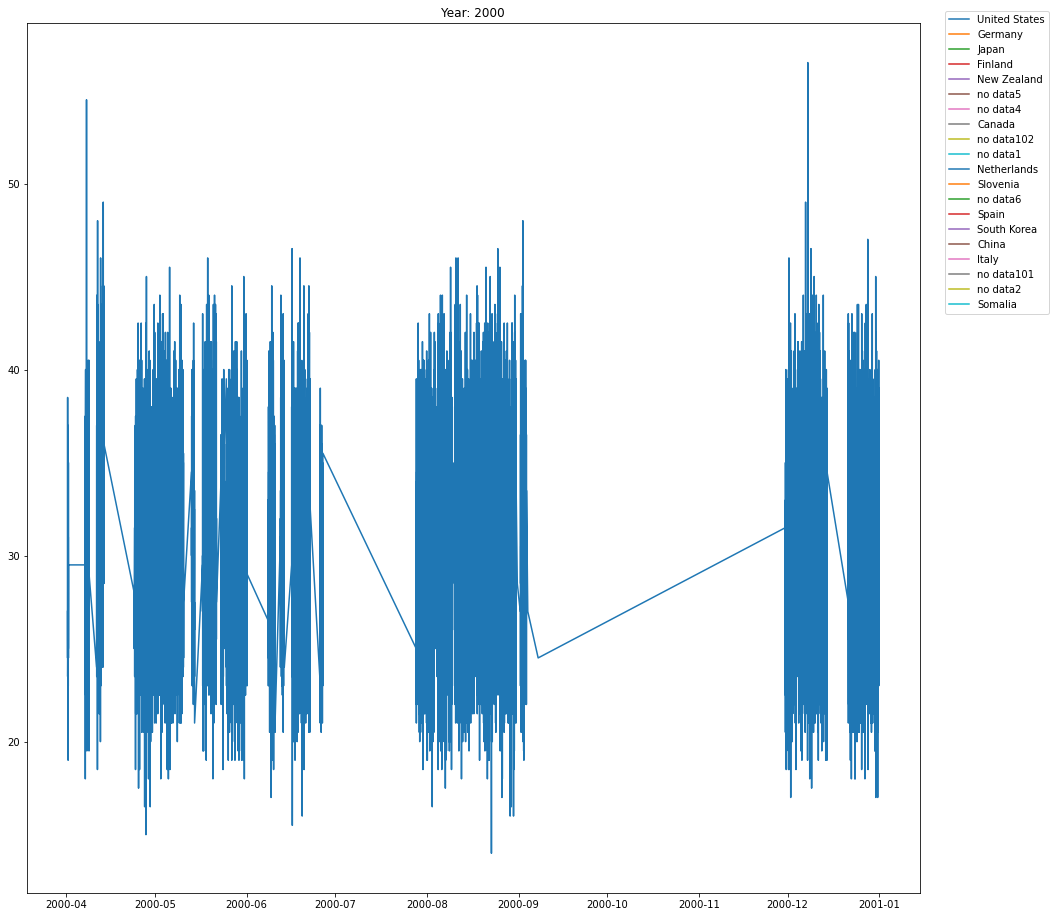

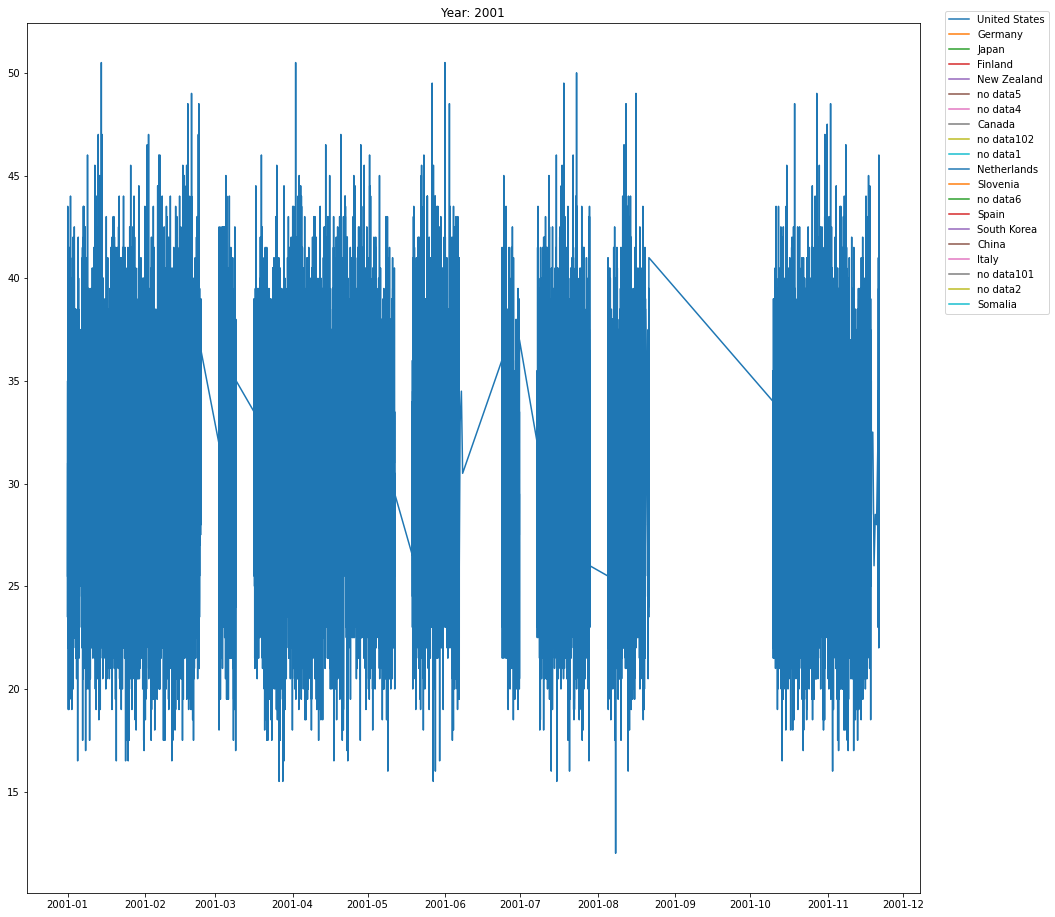

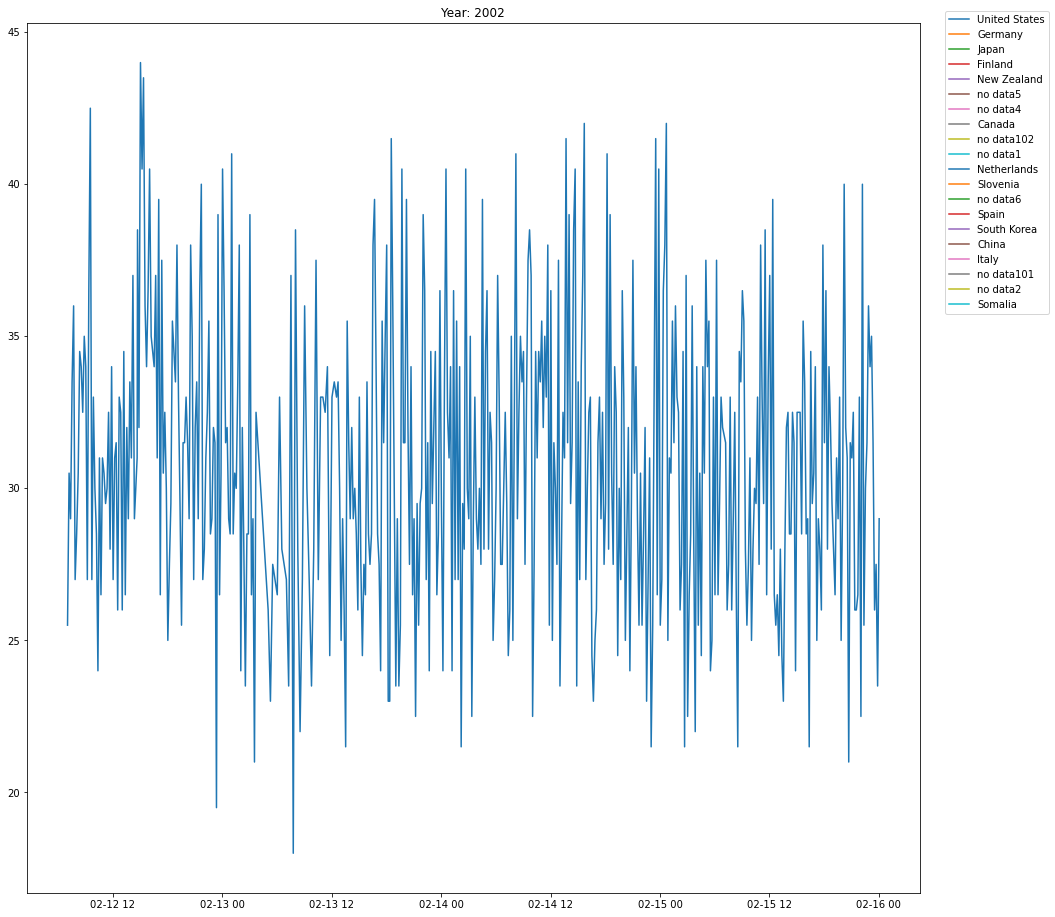

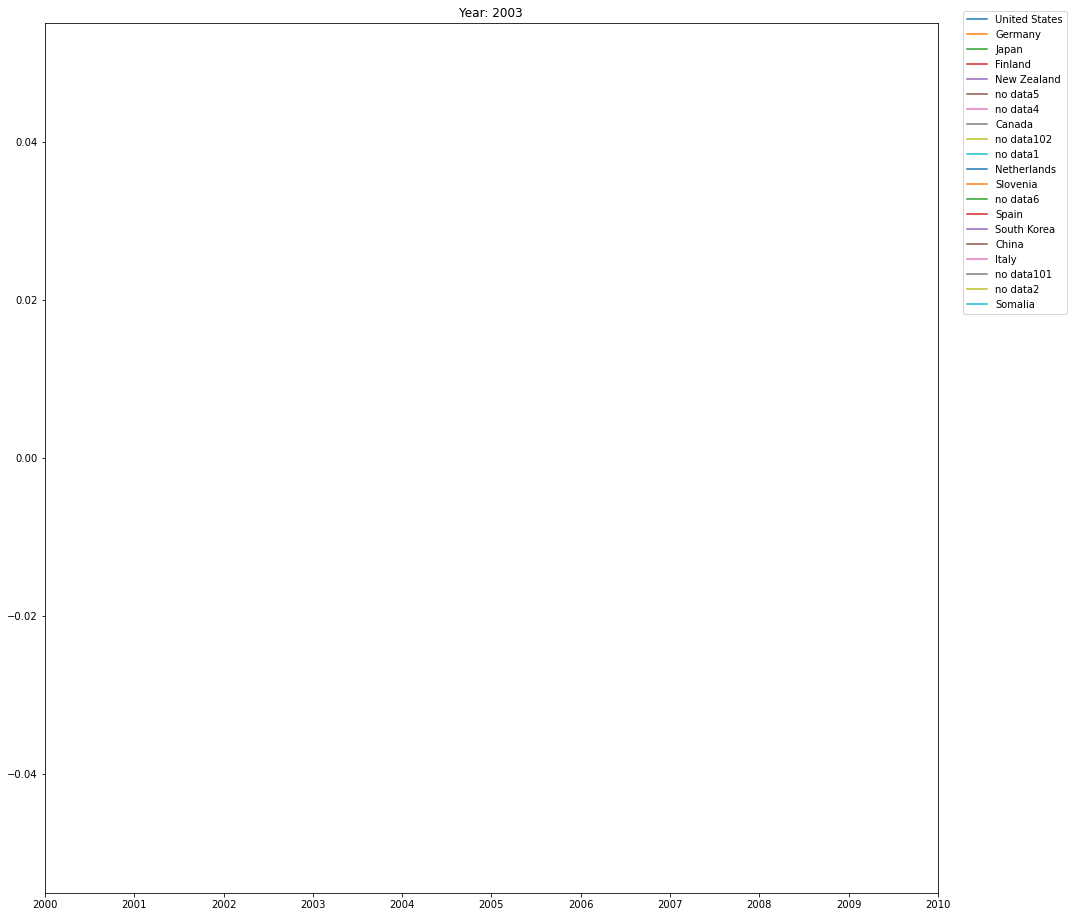

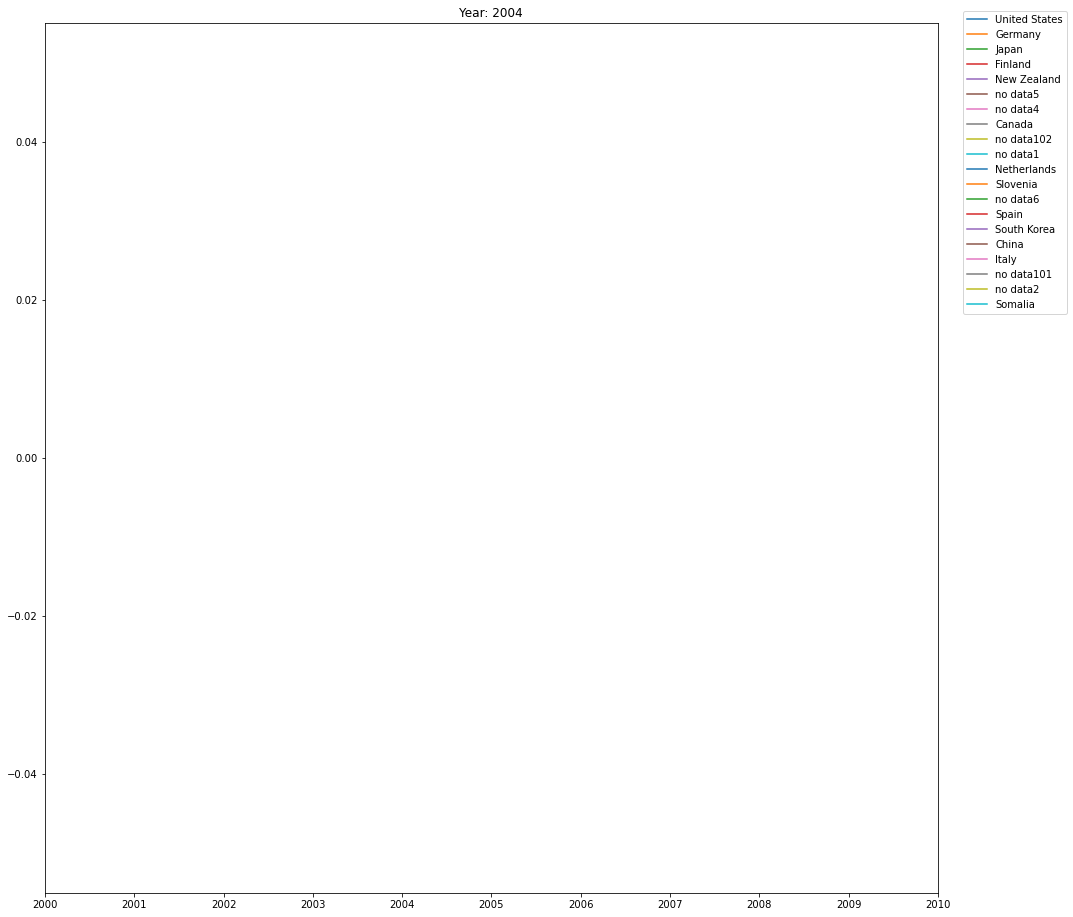

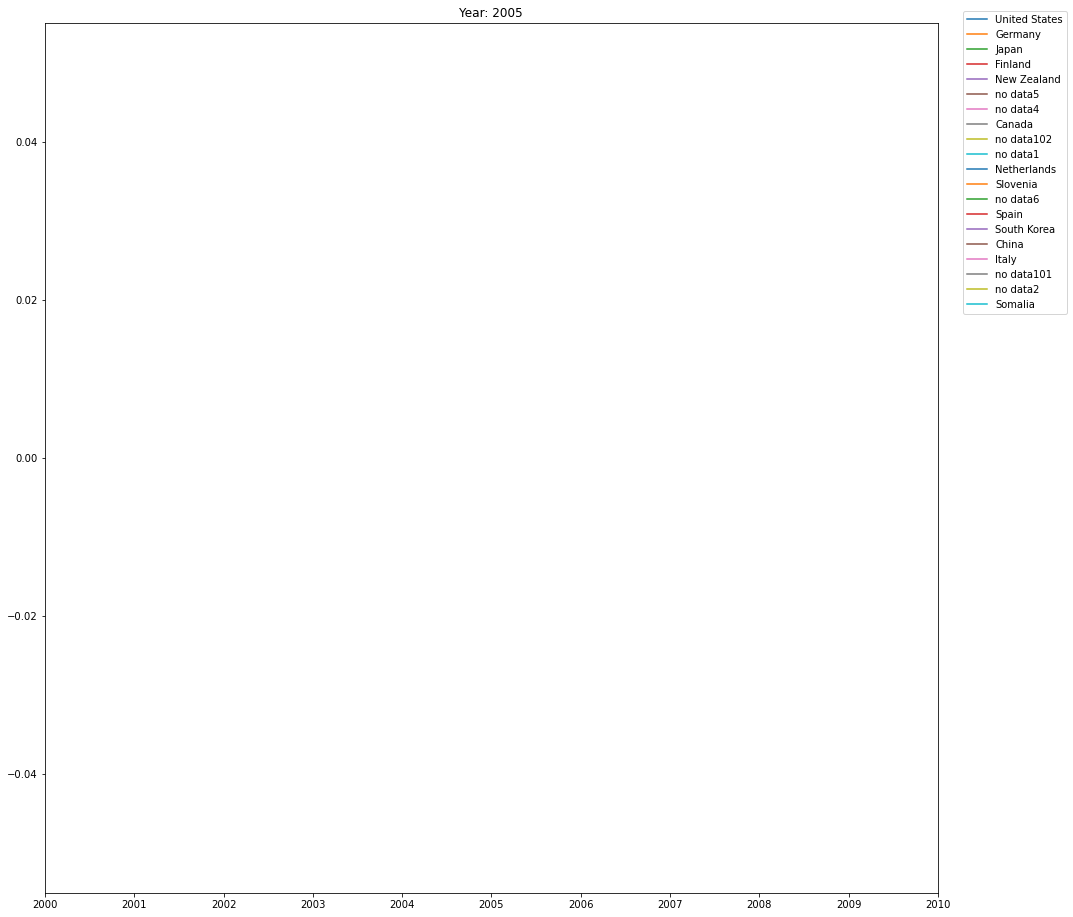

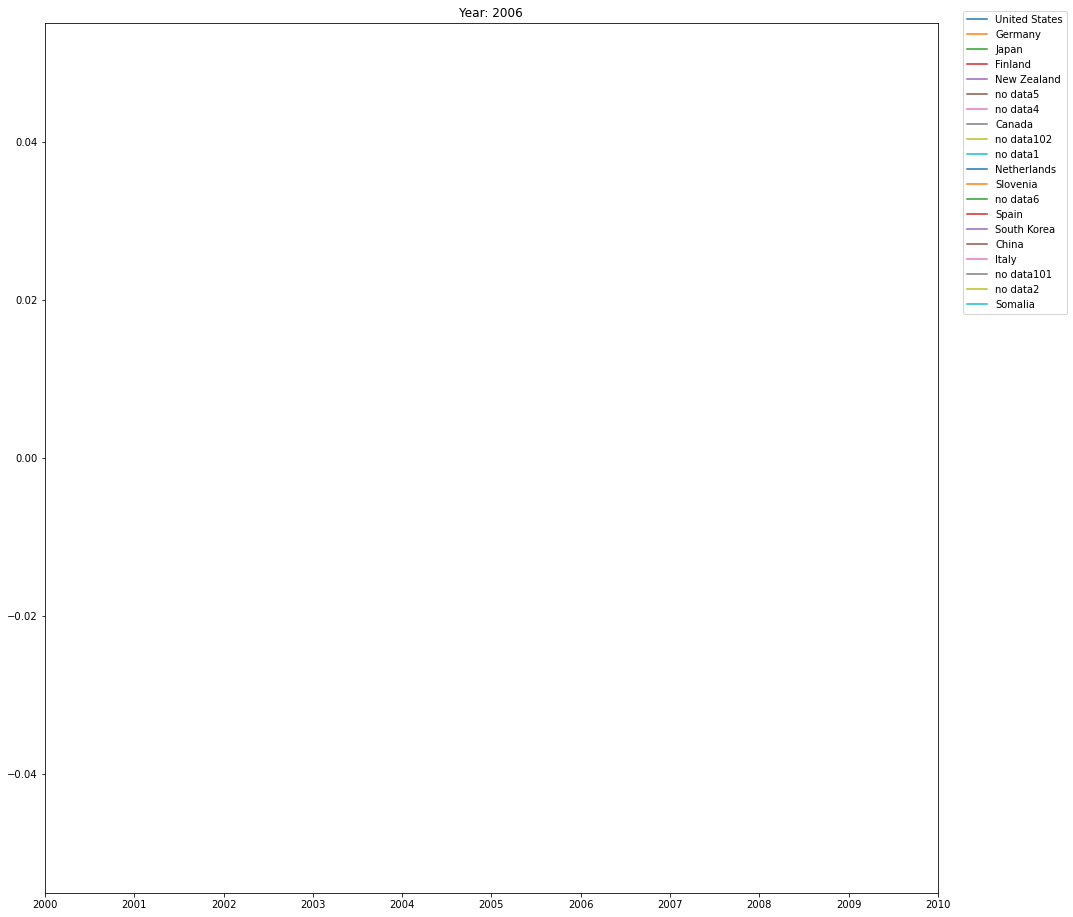

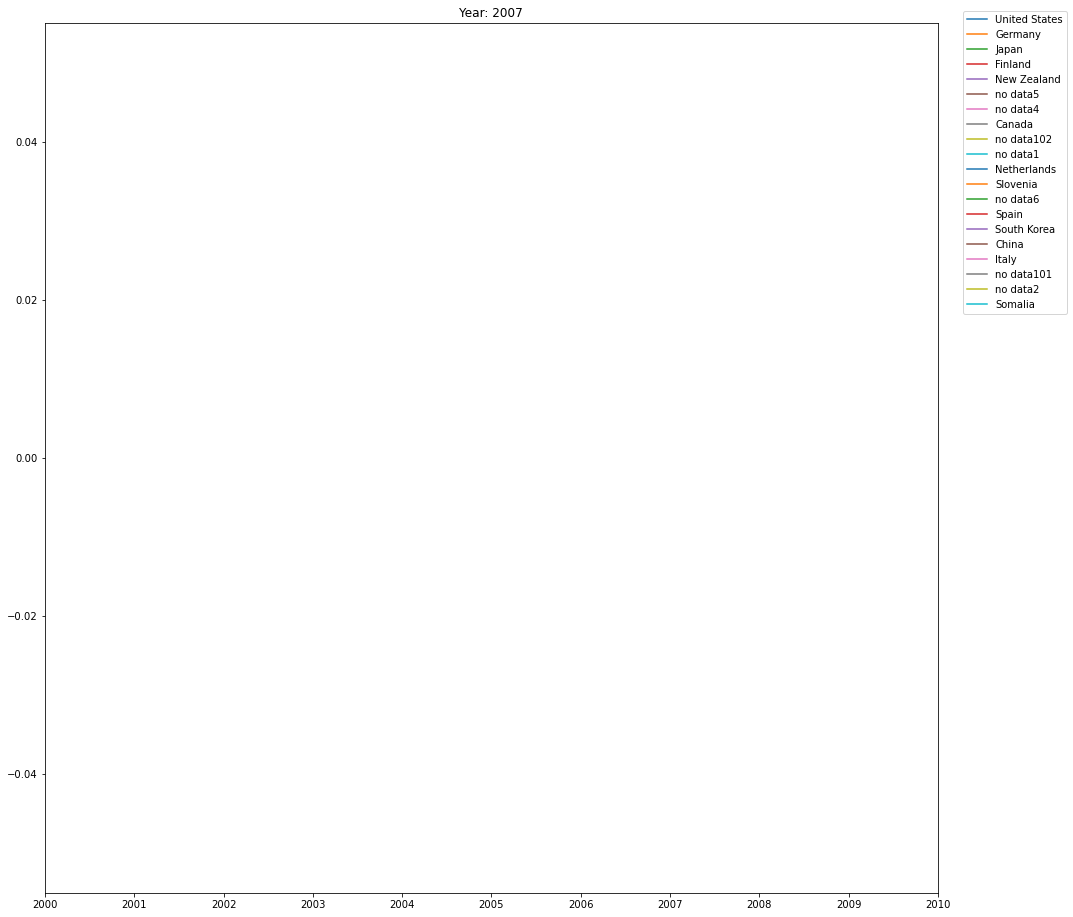

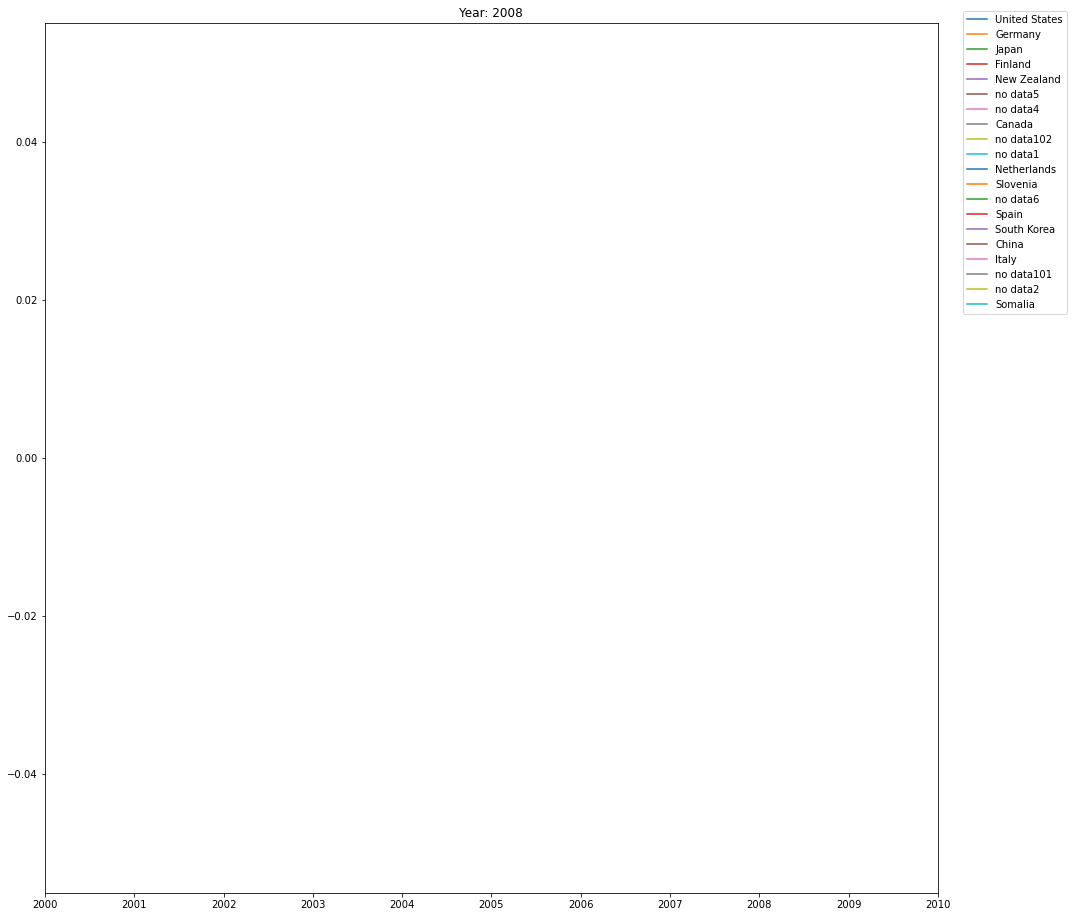

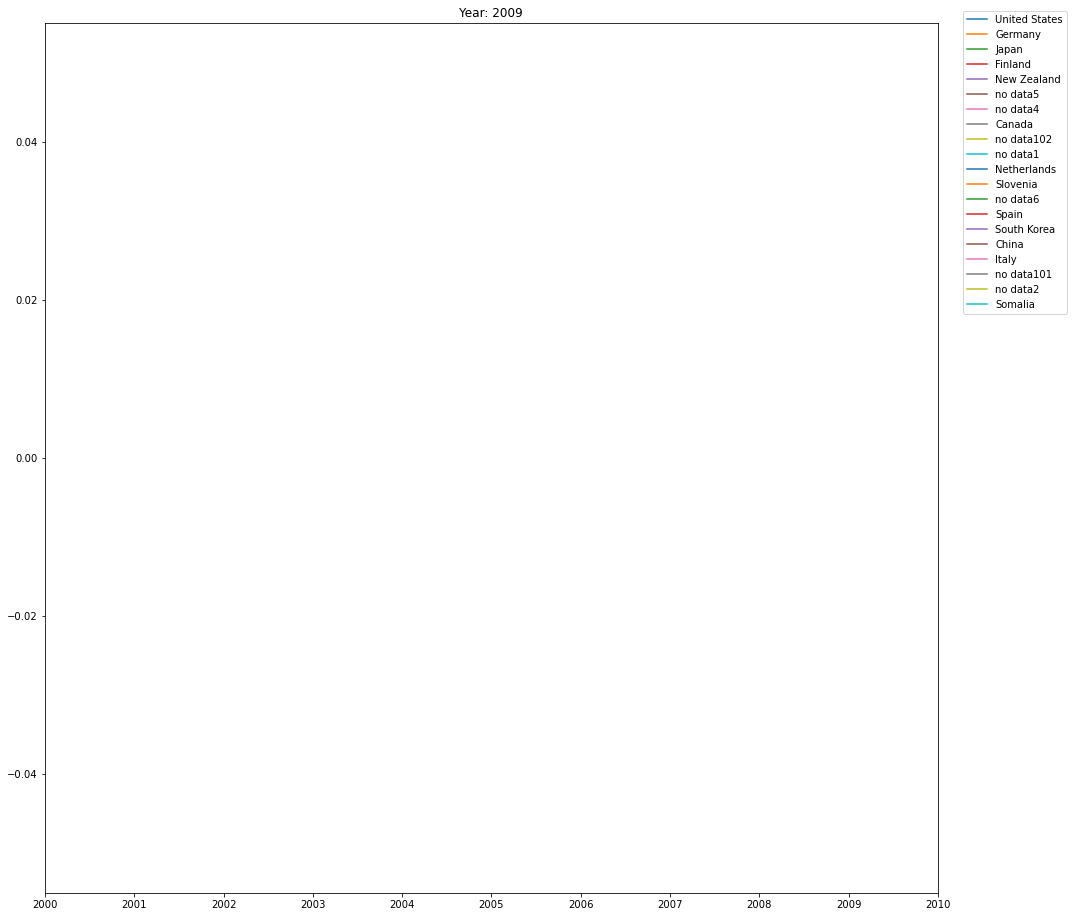

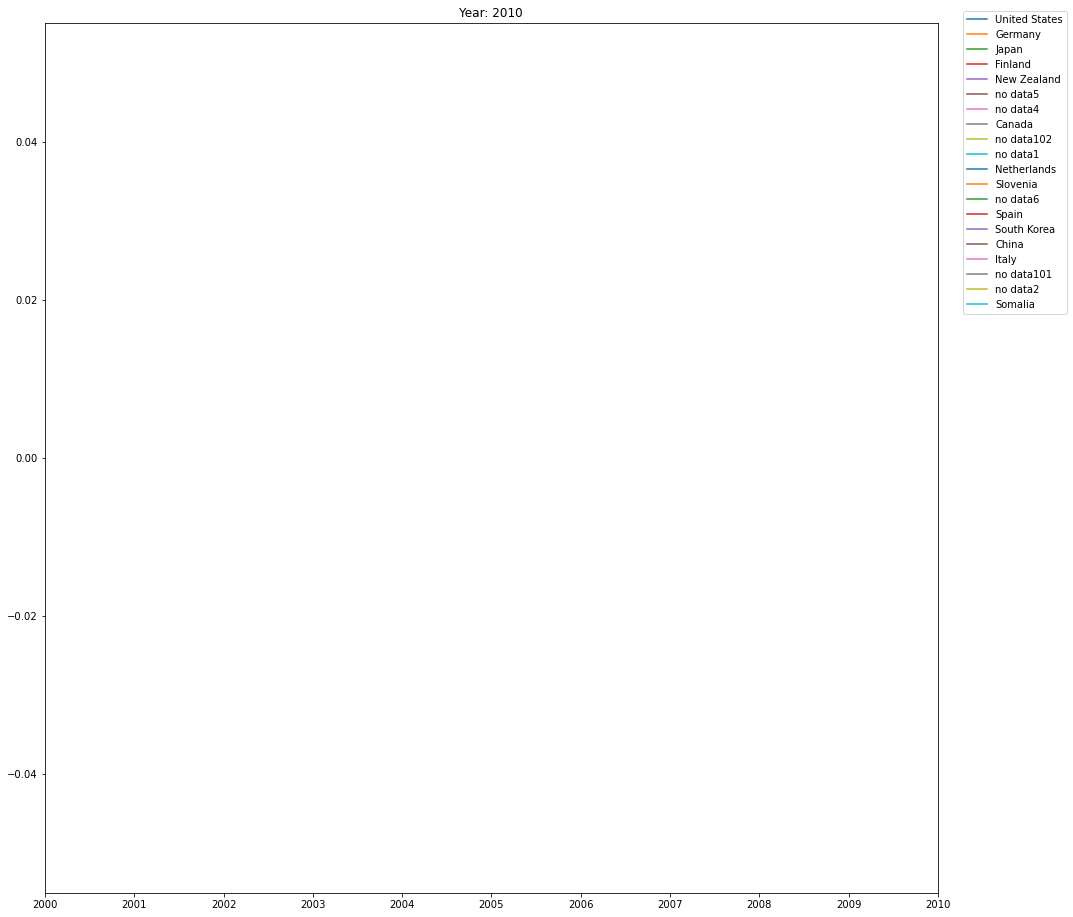

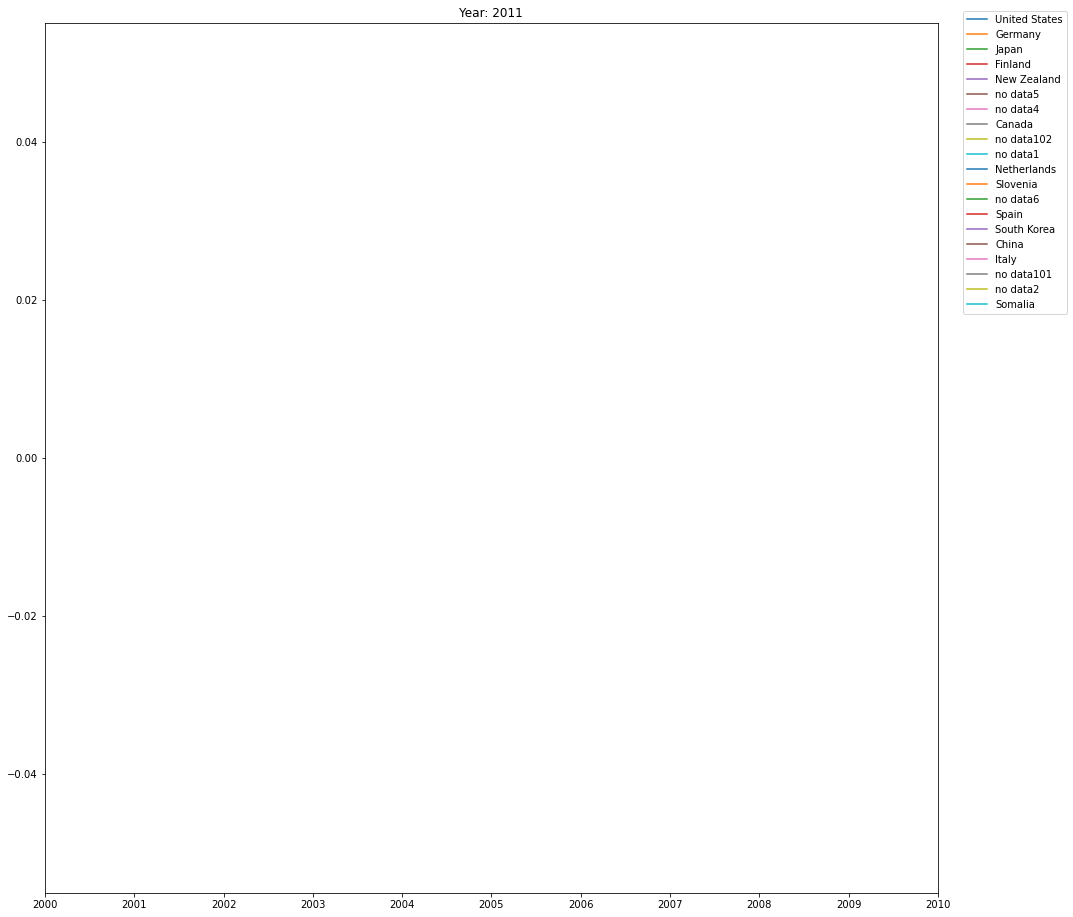

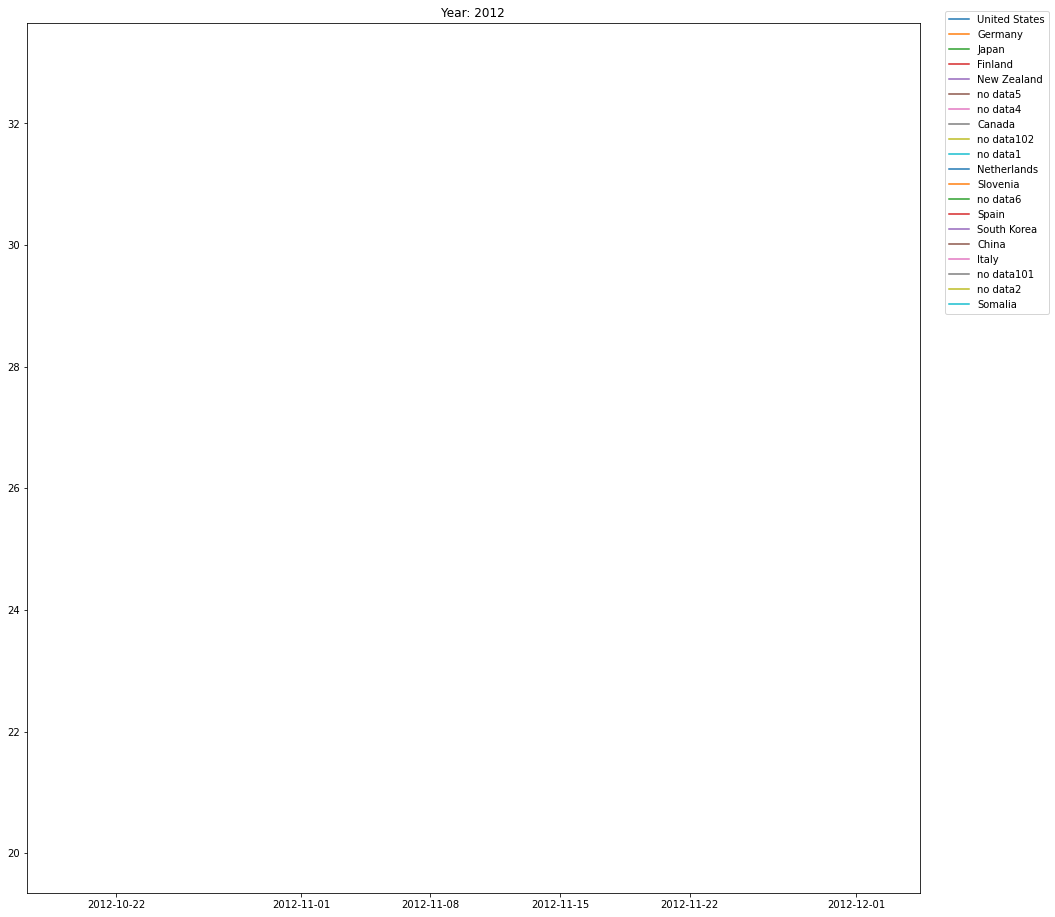

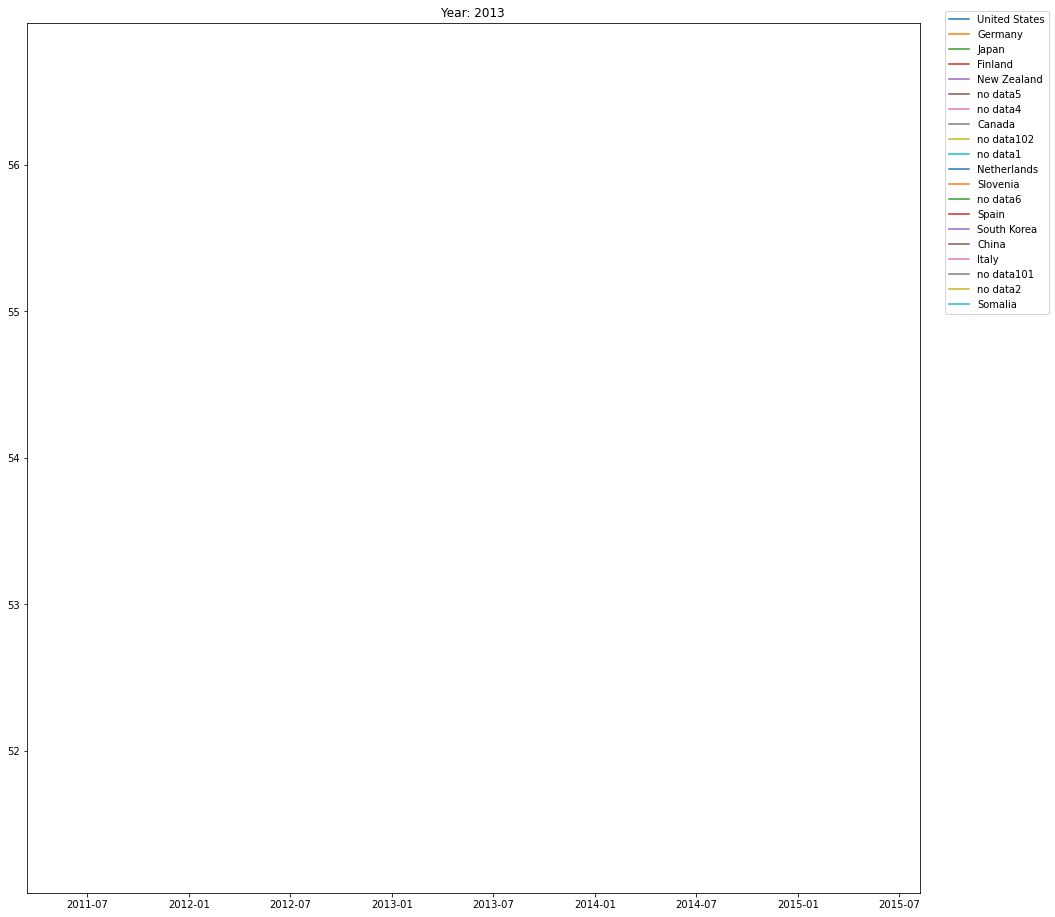

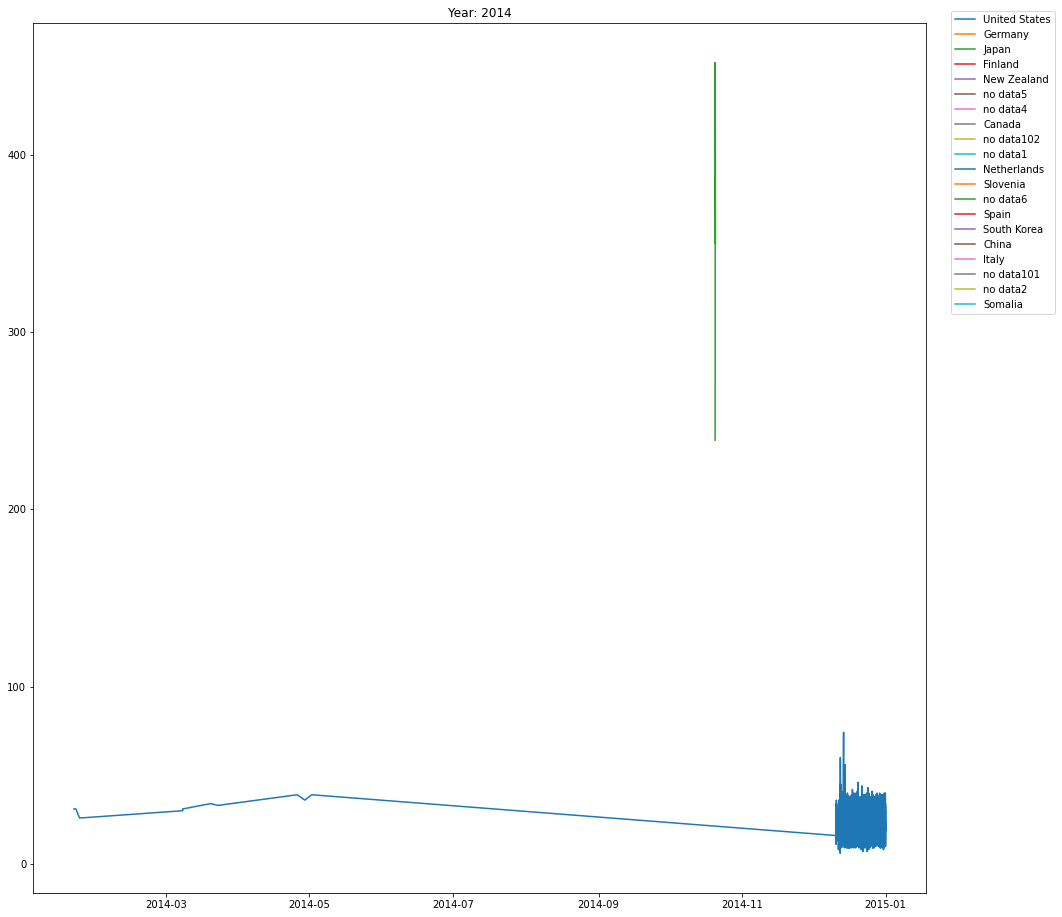

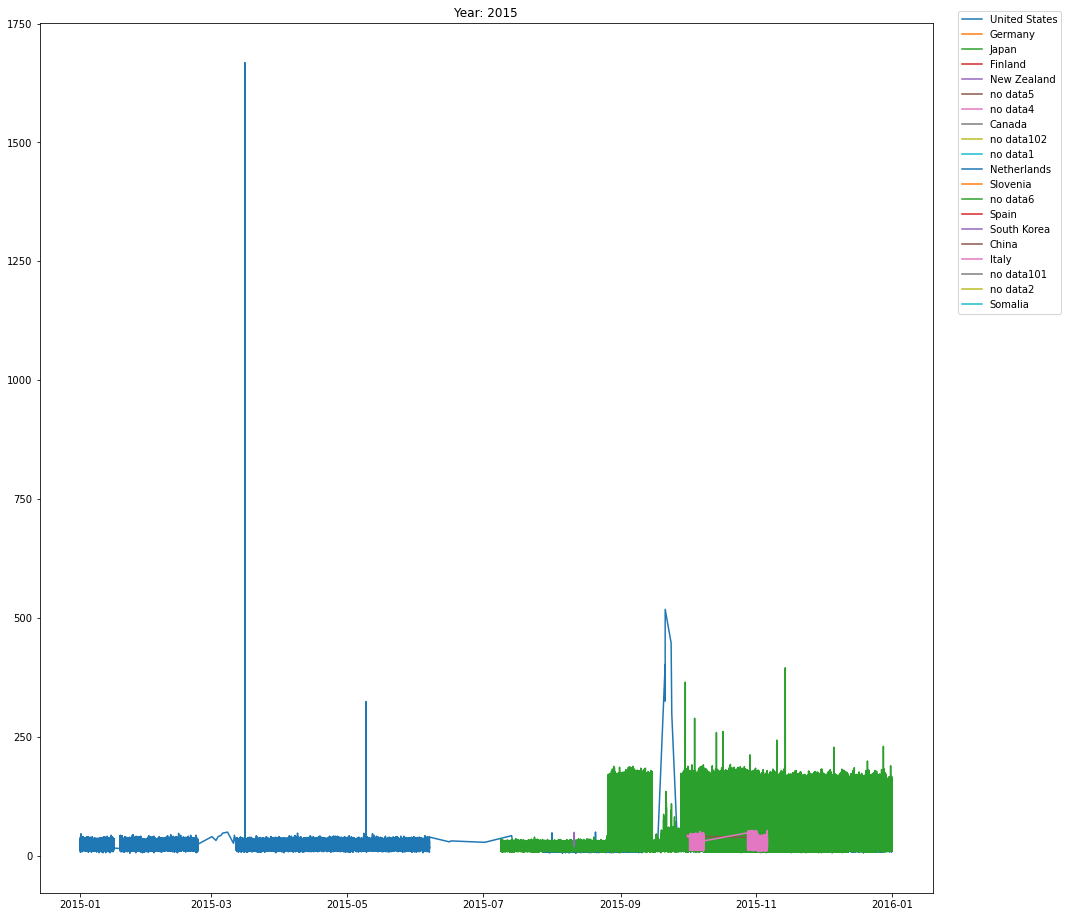

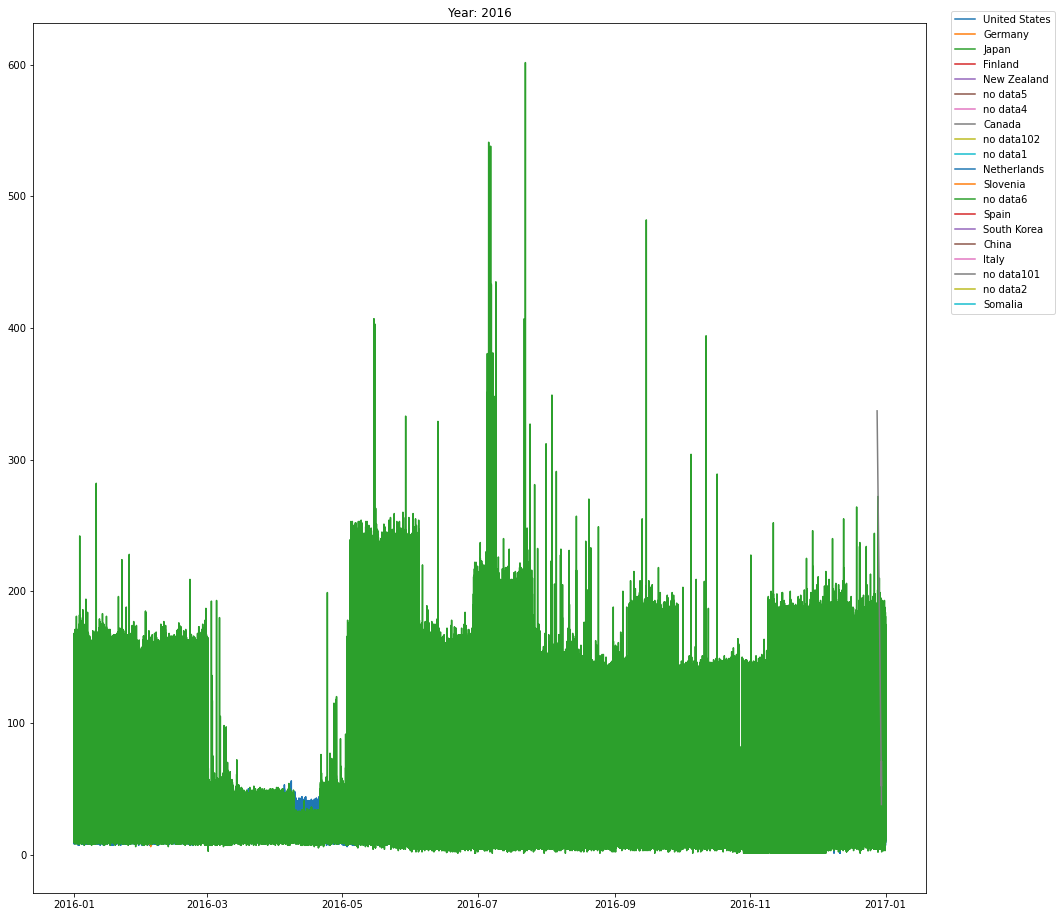

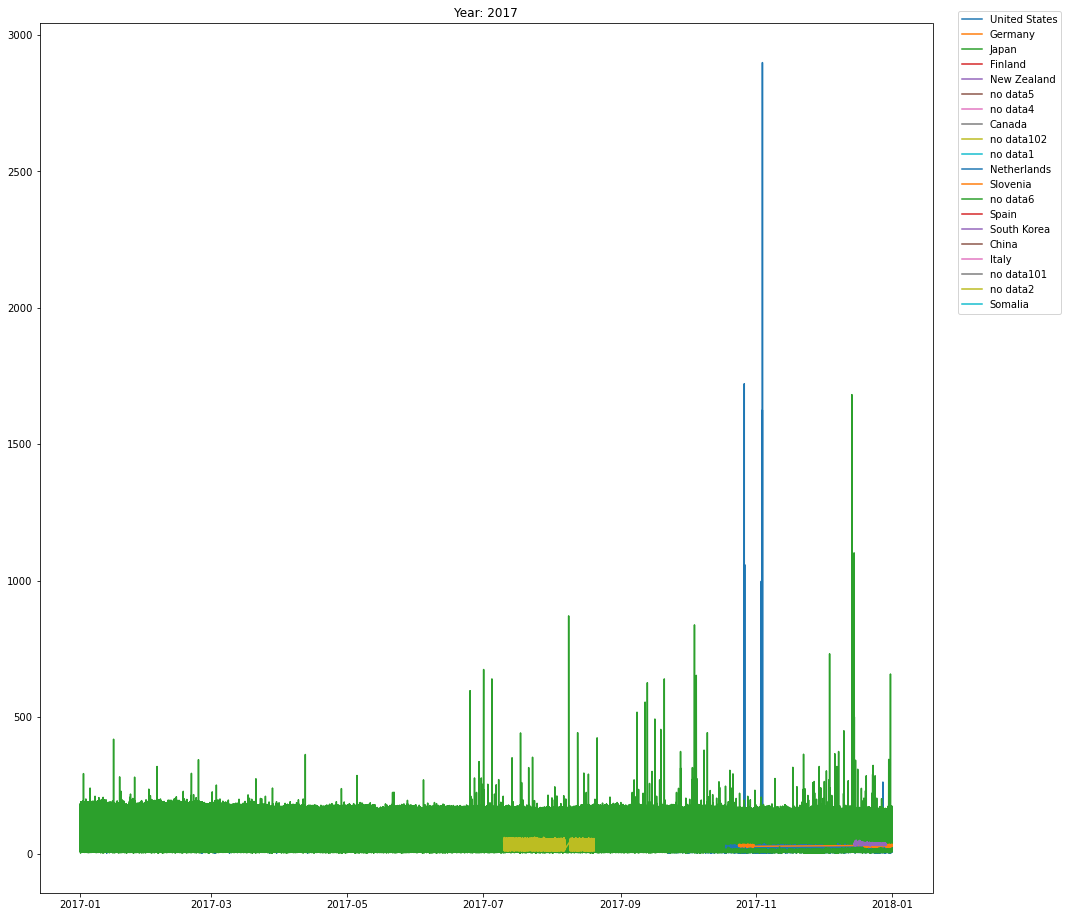

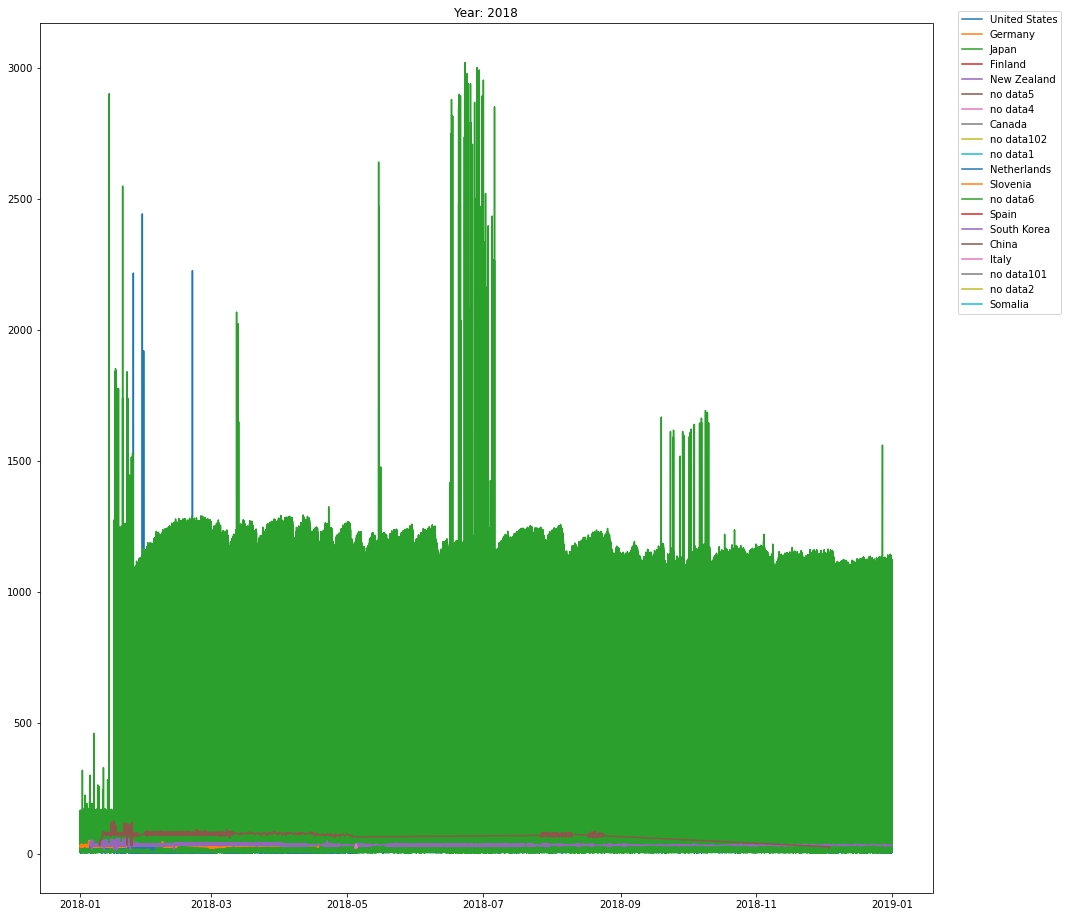

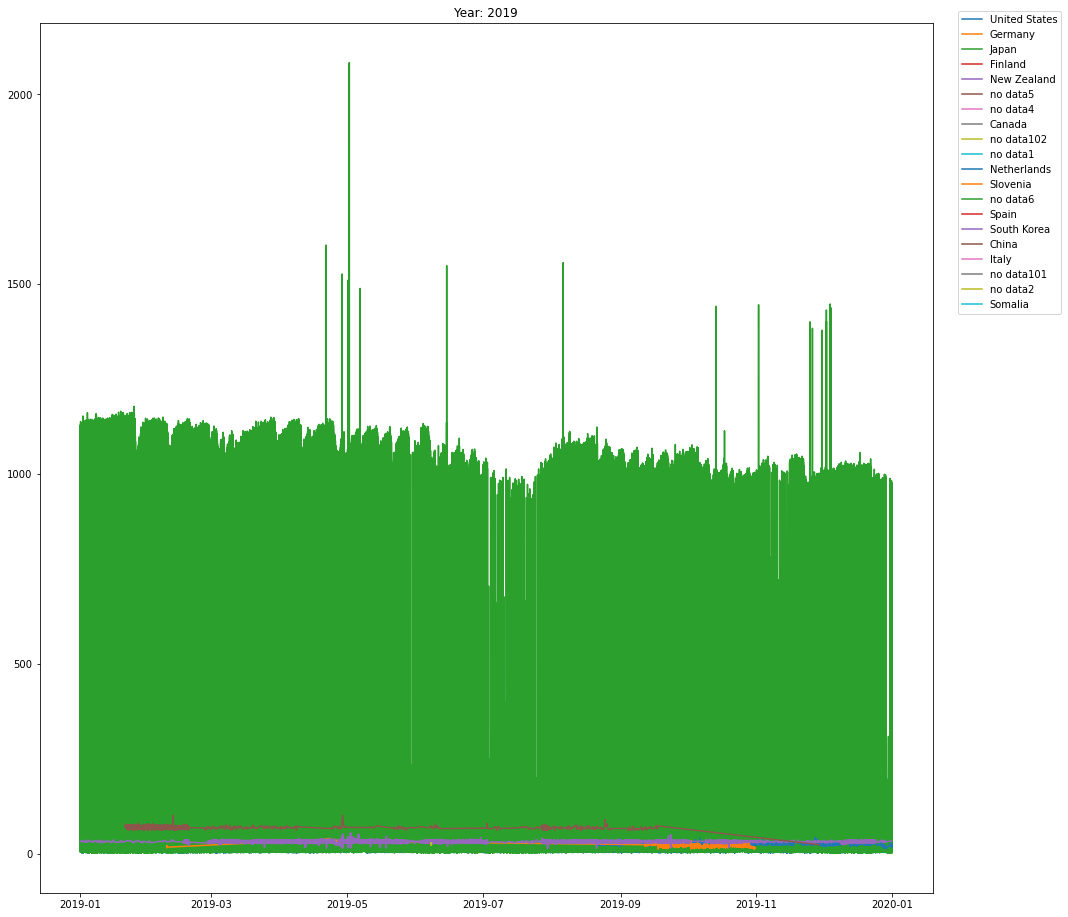

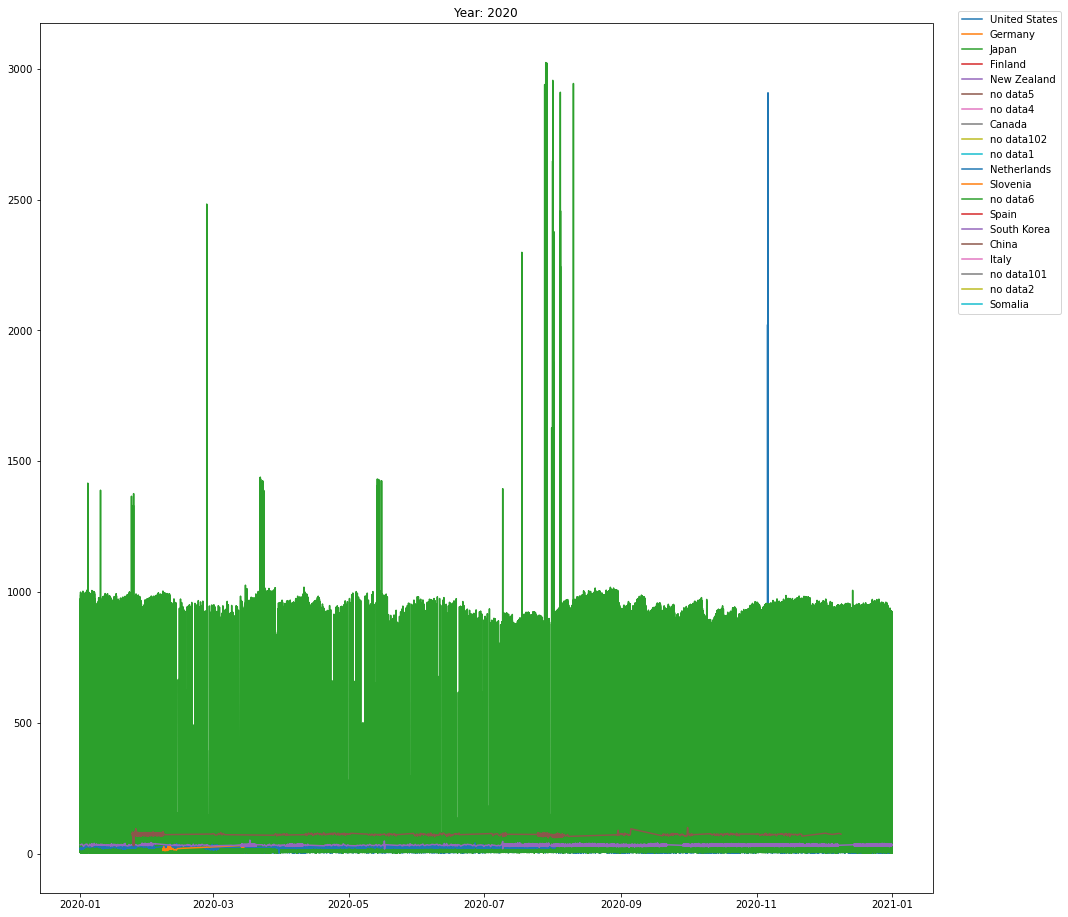

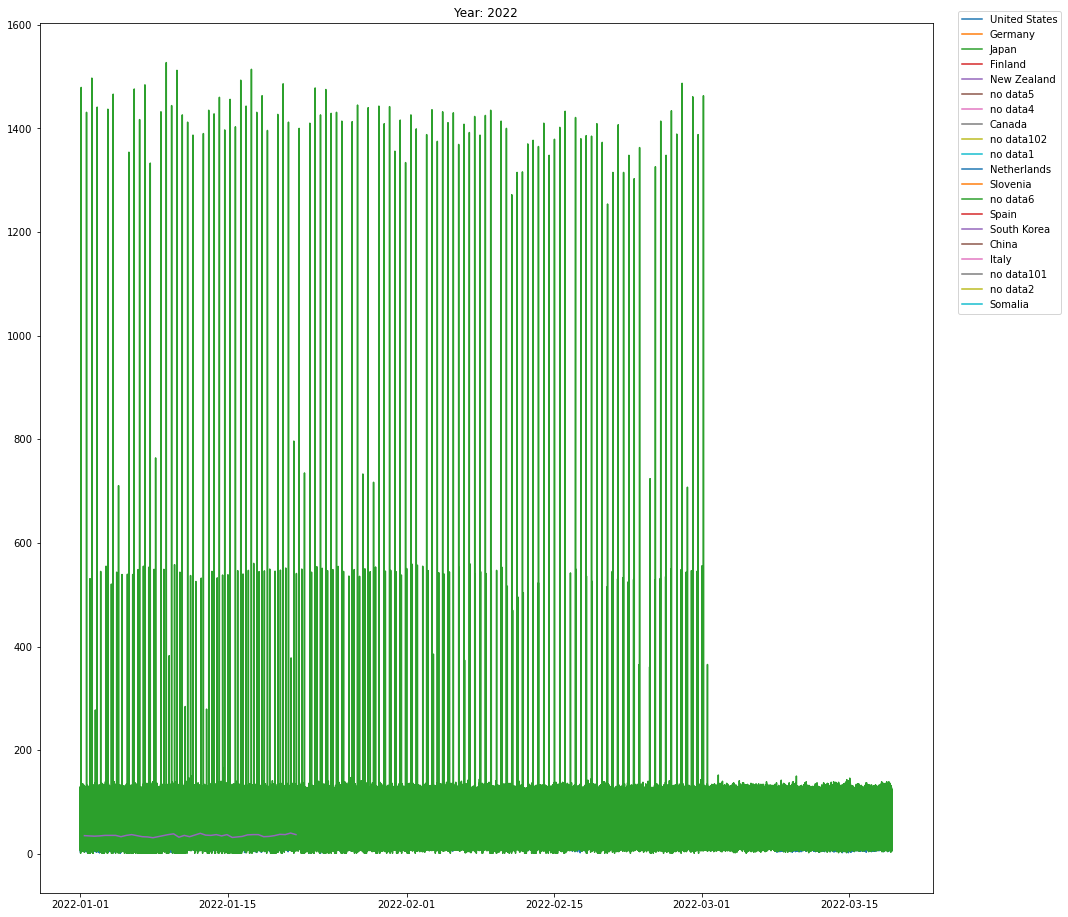

In [20]:
plot_2d(country_list, countries, year_list, years)

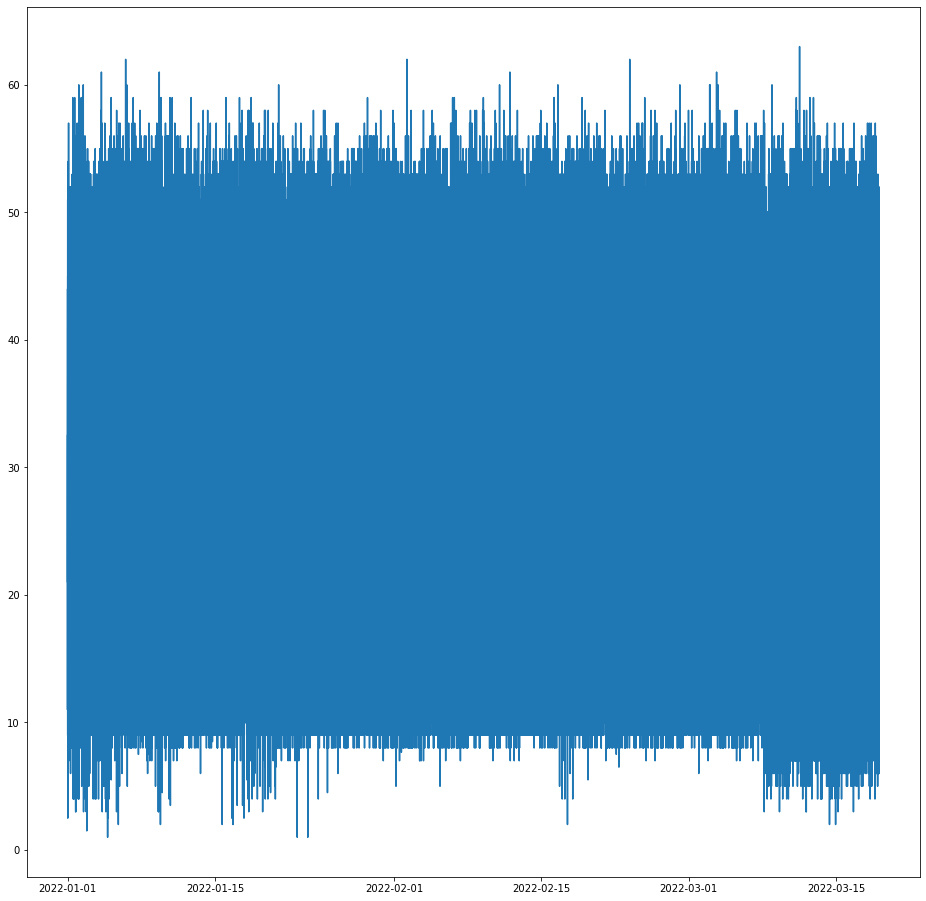

In [21]:
plt.figure(figsize=(16,16))
plt.plot(country_list[0]['Captured Time'], country_list[0]['Value'])

In [3]:
# plot_2d_plotly(country_list, countries, year_plotly_list, years) wywala sie za duzo pkt